# Regression

* It is a type of Supervised learning.
* Labeled data is used to make prediction in continuous form.
* The output of the data is always ongoing.
* This algorithm is used to find the relationship between independent variables (inputs) and dependent variable     (outputs).
* Can be used for house price predictions, weather forecast, agricultural forecast etc.

---

Lets take a simple example to understand how regression works.
We will be predicting house price based on the size of house in squared feet.
Suppose **X** is the size of the house and __y__ is the corresponding house price.

We will need to predict the function of **X** i.e. ___f(X)___ such that

# `y = f(X) + c`

**X (input)** = size of the house in feet<sup>2</sup>.

**y (output)** = house price

**f** = function describing the relationship between X and Y

**c** = random error term (positive or negative) with mean zero


## Sample Training data:

| Size in feet<sup>2</sup>(X) | price($) in 1000's(y) |
|--------|-------|
| 2104   | 460   |
| 1416   | 232   |
| 1534   | 315   |
| 852    | 178   |
| ---    | ---   |

---

### How it works:
<img src="regression.png" width="400"/>

### Hypothesis: `h = m*X + c` 

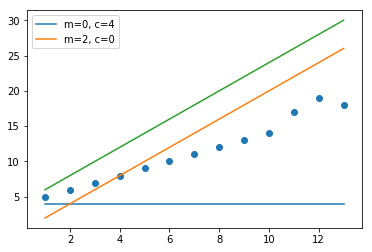

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]) # [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13]])
y = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 19, 18]) # y = x + 4

m1 = 0
c1 = 4
f1 = m1 * x + c1
plt.plot(x, f1)
m2 = 2
c2 = 0
f2 = m2 * x + c2
plt.plot(x, f2)
m3 = 2
c3 = 4
f3 = m3 * x + c3
plt.legend(["m=0, c=4", "m=2, c=0", "m=2, c=4"])
plt.plot(x, f3)
plt.scatter(x, y)
plt.show()

### Here I am just using some random values for m and c to generate a line and visualize their distance from the points

So we know that to make predictions using linear regression we need to find values for m and c in the equation.
In above example the line is not perfectly align with the points.
So we need to minimize the difference between predictions and actual values.

Our prediction is denoted by **h** and actual values are denoted by __y__. 

So to minimize the difference, we need to minimize the **`h - y`** for every input in __X__. hence we need to minimize the sum of the difference of all the predicitions and actual values which can be denoted by $\sum_{i=1}^{n}(h(x_i) - y_i)$

To get the effective results, the function to be minimized is generally the squared error function which can be written as $\frac{\sum_{i=1}^{n}(h(x_{i}) - y_{i})^{2}}{2n}$. This is also called the cost function.

To better understand the cost function, we will look at an example with the equation $h = m*X$

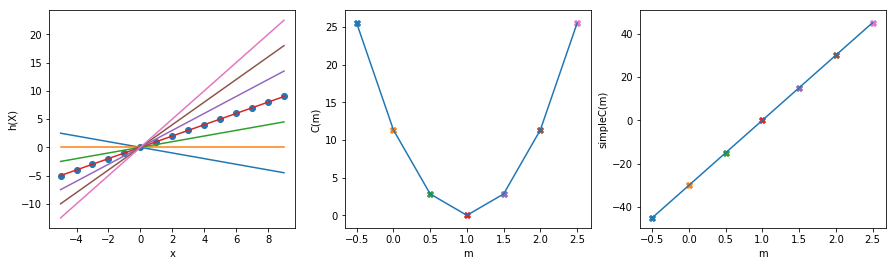

In [3]:
def cost_function(m, x, y):
    return np.sum((m*x - y)**2)/(2*len(x))

def simple_c_f(m, x, y):
    return np.sum(m*x-y)

sampleX = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
sampley = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
m_array = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5]
y_s = [m*sampleX for m in m_array]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
ax1.scatter(sampleX, sampley)
for y in y_s:
    ax1.plot(sampleX, y)
ax1.set_ylabel("h(X)")
ax1.set_xlabel("x")
costs = []
s_costs = []
for m in m_array:
    cost = cost_function(m, sampleX, sampley)
    costs.append(cost)
    ax2.scatter(m, cost, marker="X")  
    s_cost = simple_c_f(m, sampleX, sampley)
    s_costs.append(s_cost)
    ax3.scatter(m, s_cost, marker="X")
ax2.set_ylabel("C(m)")
ax2.set_xlabel("m")
ax3.set_ylabel("simpleC(m)")
ax3.set_xlabel("m")
ax2.plot(m_array, costs)
ax3.plot(m_array, s_costs)

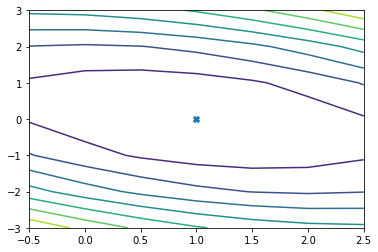

In [4]:
def cost_function(m, c, x, y):
    return np.sum(((m*x + c) - y)**2)/(2*len(x))

c_array = [-3, -2, -1, 0, 1, 2, 3]

costs = [[cost_function(m, c, sampleX, sampley) for c in c_array] for m in m_array]
plt.contour(m_array, c_array, costs)
plt.scatter(1, 0, marker="X")

Now that we know how the cost function is calculated and that we need to minimize it to get to the maximum accuracy let's see how to minimize the function.

Let's take a look at all the formulas again

1. $h(X) = c + mX$


2. $C(c, m) = \frac{\sum_{i=1}^{n}(h(x_{i}) - y_{i})^{2}}{2n}$ = $\frac{\sum_{i=1}^{n}(mx_{i} + c) - y_{i})^{2}}{2n}$

We can write the above formulas as follows:

1. $h(X) = a_{0} + a_{1}X$


2. $C(a_{0}, a_{1}) = \frac{\sum_{i=1}^{n}(h(x_{i}) - y_{i})^{2}}{2n}$ = $\frac{\sum_{i=1}^{n}(a_{1}x_{i} + a_{0}) - y_{i})^{2}}{2n}$


To minimize the cost function $C(a_{0}, a_{1})$ we will use the following method:

Repeat until convergence =>

   * $a_{0} = a_{0} - \alpha\frac{d}{d_{a_{0}}}C(a_{0}, a_{1})$
   * $a_{1} = a_{1} - \alpha\frac{d}{d_{a_{1}}}C(a_{0}, a_{1})$
   
Here $\alpha$ is the learning rate.

**Solving the above equations, we get following formulas**

   * $a_{0} = a_{0} - \alpha\frac{\sum_{i=1}^{n}(h(x_{i}) - y_{i})}{n}$
   * $a_{1} = a_{1} - \alpha\frac{\sum_{i=1}^{n}(h(x_{i}) - y_{i})*x_{i}}{n}$

Avg loss:
0.0098452404553782
Value of c:
0.10932225202485181
Value of m:
0.9899932652920669


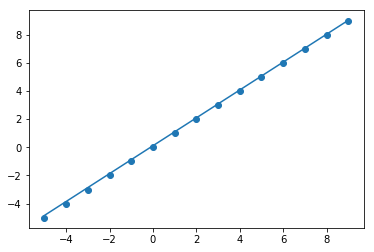

In [5]:
a0 = 2
a1 = -1

def calculate_hypothesis(c, m, x):
    return c + m*x

def calculate_gradient_for_c(c, h, y, alpha):
    return c - alpha*(np.sum(h-y)/len(y))

def calculate_gradient_for_m(m, h, x, y, alpha):
    return m - alpha*((np.sum((h-y)*x))/len(y))

h = calculate_hypothesis(a0, a1, sampleX)
while np.mean((h-sampley)**2) > 0.01:
    a0 = calculate_gradient_for_c(a0, h, sampley, 0.01)
    a1 = calculate_gradient_for_m(a1, h, sampleX, sampley, 0.01)
    h = calculate_hypothesis(a0, a1, sampleX)
    
print("Avg loss:")
print(np.mean((h-sampley)**2))
print("Value of c:")
print(a0)
print("Value of m:")
print(a1)

plt.scatter(sampleX, sampley)
plt.plot(sampleX, calculate_hypothesis(a0, a1, sampleX))

0.25
0.5
0


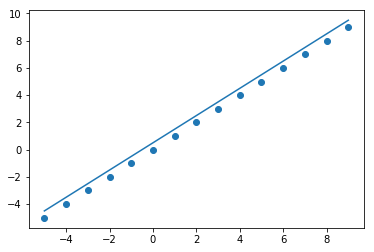

In [6]:
a0 = 0.5
a1 = 0

def calculate_hypothesis1(c, m, x):
    return c + m*(x**2) + x

h = calculate_hypothesis1(a0, a1, sampleX)
while np.mean((h-sampley)**2) > 0.7:
    a0 = calculate_gradient_for_c(a0, h, sampley, 0.01)
    a1 = calculate_gradient_for_m(a1, h, sampleX, sampley, 0.01)
    h = calculate_hypothesis(a0, a1, sampleX)
print(np.mean((h-sampley)**2))
print(a0)
print(a1)

plt.scatter(sampleX, sampley)
plt.plot(sampleX, calculate_hypothesis1(a0, a1, sampleX))

### How gradient descent works

<div>
    <span style="display:inline-block"><img src="cost_function.gif" width=400/></span>
    <span style="display:inline-block"><img src="cost_function1.gif" width=400/></span>
</div>